 Examining the SUV Dataset
 
 This notebook encompasses two main tasks:

1. Importing and visualizing the SUV Data
2. Applying logistic regression to model the SUV data

The SUV dataset provides customer details and indicates whether they made an SUV purchase or not. 

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline

 Loading and checking the dataset
 
 Link to dataset : https://www.kaggle.com/iamaniket/suv-data

In [2]:
dataset=pd.read_csv("SUV_Predictions.csv")
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
import seaborn as sb

In [4]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [5]:
dataset.shape

(400, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.groupby('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [8]:
cleaned_dataset= dataset.drop(columns=['User ID'], axis ='1')

In [9]:
cleaned_dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
cleaned_dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


 Visualizing the Data

<Axes: xlabel='Purchased', ylabel='count'>

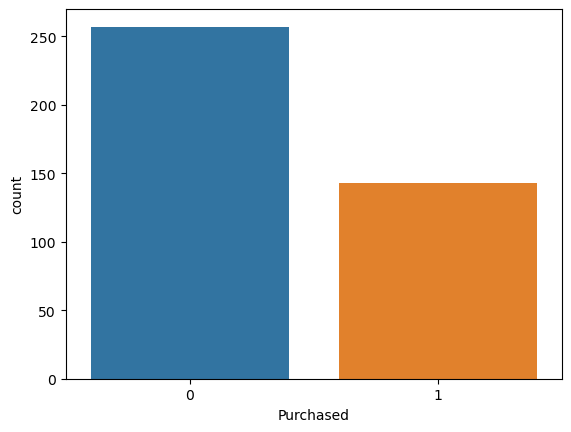

In [11]:
sb.countplot(x='Purchased', data= cleaned_dataset)

<Axes: xlabel='Purchased', ylabel='count'>

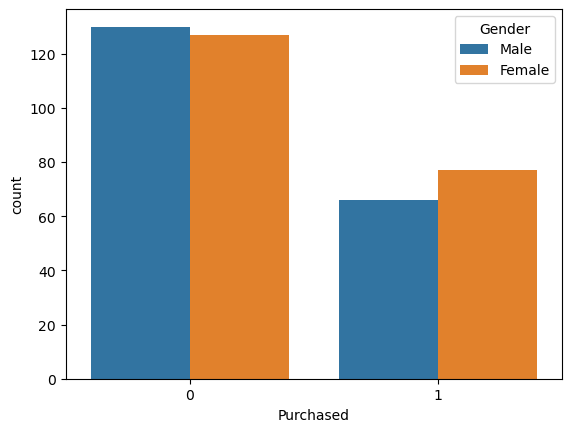

In [12]:
sb.countplot(x='Purchased', hue = 'Gender', data = cleaned_dataset)

The graph shows that women buy SUV more than men

<Axes: >

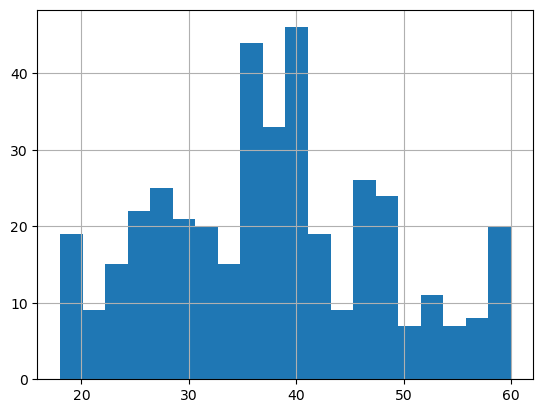

In [13]:
dataset['Age'].hist(bins = 20)

In [14]:
# Putting the Ages into category
age_category = []
m = len(dataset['Age'])
for i in range(0,m):
    if cleaned_dataset['Age'][i]<=20:
        age_category.append('A');
    elif 20 < cleaned_dataset['Age'][i] <= 26:
        age_category.append ('B');
    elif 26 < cleaned_dataset ['Age'][i] <= 30:
        age_category.append ('C');
    elif 30 < cleaned_dataset ['Age'][i] <= 40:
        age_category.append ('D');
    elif 40 < cleaned_dataset ['Age'][i] <= 50:
        age_category.append ('E');
    else:
        age_category.append ('F');
        
age_data_frame = pd.DataFrame(data = age_category, columns=['AgeCategory'])
augmented_dataset = pd.concat([cleaned_dataset, age_data_frame], axis = 1)
augmented_dataset.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


<Axes: xlabel='Purchased', ylabel='count'>

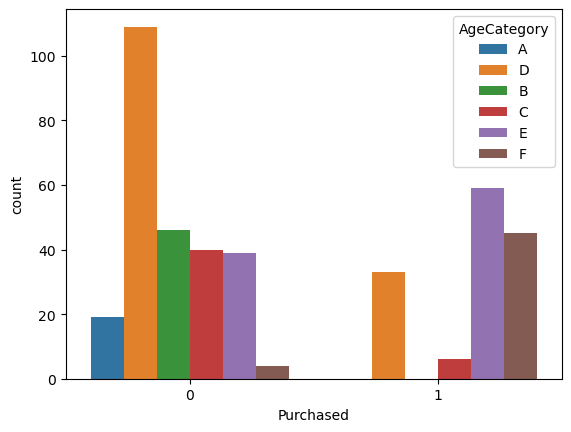

In [15]:
sb.countplot(x='Purchased', hue = 'AgeCategory', data = augmented_dataset)

=> People yonger than 20 years old don't buy a SUV.

=> People between 20 and 26 years old don't buy SUV.

=> People younger than 26 don't buy SUVs.

=> Most of the people buying SUV are between 40 to 60 years old.

<Axes: >

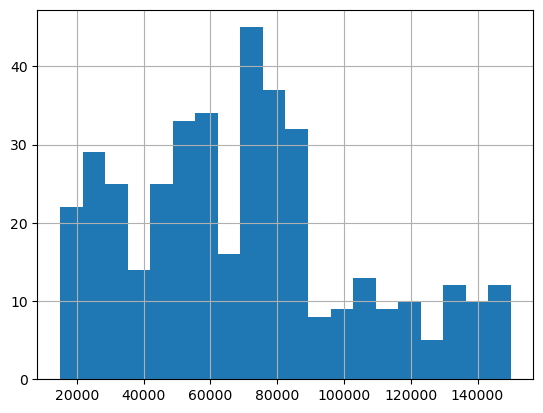

In [16]:
dataset['EstimatedSalary'].hist(bins = 20)

In [17]:
income_category = []
for i in range (0, len  (dataset ['EstimatedSalary'])):
    if cleaned_dataset ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < cleaned_dataset ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < cleaned_dataset ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < cleaned_dataset ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < cleaned_dataset ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < cleaned_dataset ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < cleaned_dataset ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

income_data_frame = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])
augmented_dataset_2 = pd.concat([augmented_dataset, income_data_frame], axis = 1)
augmented_dataset_2.head()


,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


<Axes: xlabel='Purchased', ylabel='count'>

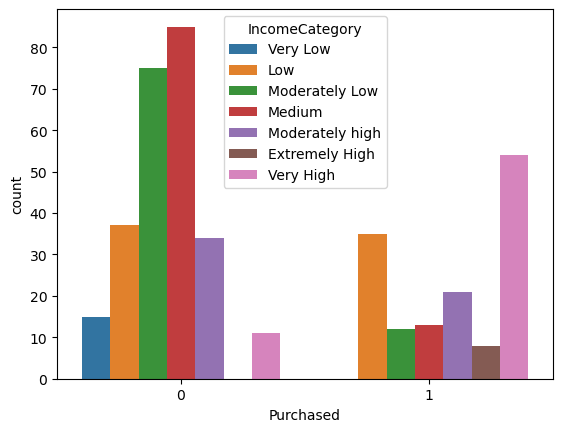

In [18]:
sb.countplot(x='Purchased', hue = 'IncomeCategory', data = augmented_dataset_2)

=> People with salaries higher that 145000 will buy SUVs.

=> People with salaries lower than 19500 won't buy SUVs.

=> Majority of people buying SUVs have slaries between 100000 to 130000.

In [19]:
binary_gender = pd.get_dummies (augmented_dataset_2 ['Gender'],drop_first = True)
binary_gender.head ()

,Male
0,True
1,True
2,False
3,False
4,True


In [21]:
binary_age = pd.get_dummies (augmented_dataset_2 ['AgeCategory'])
binary_age.head ()

,A,B,C,D,E,F
0,True,False,False,False,False,False
1,False,False,False,True,False,False
2,False,True,False,False,False,False
3,False,False,True,False,False,False
4,True,False,False,False,False,False


In [22]:
binary_income = pd.get_dummies (augmented_dataset_2 ['IncomeCategory'])
binary_income.head ()

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False


In [23]:
final_dataset = pd.concat([augmented_dataset_2, binary_age, binary_gender, binary_income,], axis = 1)
final_dataset_1 = final_dataset.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)
final_dataset_1.head ()

,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,0,False,False,False,True,False,False,True,False,True,False,False,False,False,False
2,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,0,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,0,True,False,False,False,False,False,True,False,False,True,False,False,False,False


Modeling Data

We consider all the features avilable in the dataset

In [24]:
X = final_dataset_1.drop (columns=['Purchased'], axis = 1)
Y = final_dataset_1['Purchased']

In [25]:
X.head()

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1,False,False,False,True,False,False,True,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,True,False,False,False,False


In [27]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [29]:
test_set_size = 0.25
seed = 0
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

Since the values of the estimated salary feature are in a wide range we need to scale the values.

In [31]:
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [32]:
classifier = LogisticRegression (random_state = seed, solver = 'liblinear')
classifier.fit (X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [33]:
predictions = classifier.predict (X_test)

In [34]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        68
           1       0.90      0.84      0.87        32

    accuracy                           0.92       100
   macro avg       0.91      0.90      0.91       100
weighted avg       0.92      0.92      0.92       100



In [37]:
accuracy_score (Y_test, predictions)*100

92.0

=> Considering all features provides a better accuracy and a better prediction model of the data.